In [1]:
import pandas as pd
import numpy as np
import scipy.special

In [2]:
def get_data(file, group):
    dt=pd.read_csv(file, header=None,skiprows=[0,1,4002,4003])
    n=dt.shape[0]//group
    odat=np.zeros(n)
    for i in range(1,n+1):
        odat[i-1]=np.sum(dt[0][(i-1)*group:i*group])
        #print(dt[0][(i-1)*group:i*group],odat[i-1])
    return odat

In [3]:
def rsch_w(data):
    st=list(set(data))
    ret=np.zeros(int(max(st))+1)
    for i in range(len(st)):
        ret[int(st[i])]=data[data==st[i]].shape[0]/data.shape[0]
    return ret
def dat_to_hist(data):
    dt=rsch_w(data)
    return pd.DataFrame({'x':np.linspace(0,dt.shape[0],dt.shape[0]), 'y':dt})

In [4]:
x=get_data('exp1.txt',50)
dat_to_hist(x)

,x,y
0,0.000000,0.0000
1,1.007353,0.0000
2,2.014706,0.0000
3,3.022059,0.0000
4,4.029412,0.0000
...,...,...
132,132.970588,0.0000
133,133.977941,0.0000
134,134.985294,0.0000
135,135.992647,0.0000


In [5]:
def pausson(data_l,n):
    return ((n**(data_l))*(np.e**(-n)))/(scipy.special.factorial(data_l))

In [6]:
pausson(np.arange(1,10,1),5.)

array([0.03368973, 0.08422434, 0.1403739 , 0.17546737, 0.17546737,
       0.14622281, 0.10444486, 0.06527804, 0.03626558])

In [7]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

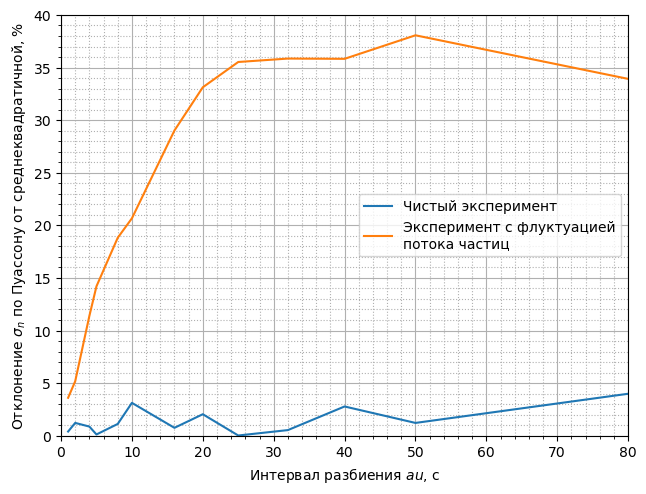

In [58]:
x=[]
y=[]
y1=[]
for n in range(1,100):
    if (4000%n!=0):
        continue
    data=get_data('exp2.txt',n)
    n_av=np.sum(data)/data.shape[0]
    sigm_1=np.sqrt(n_av)
    sigm_2=np.sqrt(np.sum((data - n_av)**2)/data.shape[0])
    #print(n,np.abs(sigm_1-sigm_2)/sigm_2*100)
    x.append(n)
    y.append(np.abs(sigm_1-sigm_2)/sigm_2*100)
    data=get_data('exp1.txt',n)
    n_av=np.sum(data)/data.shape[0]
    sigm_1=np.sqrt(n_av)
    sigm_2=np.sqrt(np.sum((data - n_av)**2)/data.shape[0])
    #print(n,np.abs(sigm_1-sigm_2)/sigm_2*100)
    y1.append(np.abs(sigm_1-sigm_2)/sigm_2*100)
fig,ax=plt.subplots()

ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
fig.tight_layout()

sns.lineplot(x=x,y=y,ax=ax, label='Чистый эксперимент')
sns.lineplot(x=x,y=y1,ax=ax, label='Эксперимент с флуктуацией\nпотока частиц')
#sns.lineplot(x=x,y=[np.average(y[-5:])]*len(x))
ax.set_ylabel(r'Отклонение $\sigma_n$ по Пуассону от среднеквадратичной, %')
ax.set_xlabel('Интервал разбиения $\tau$, c')
ax.set_xlim([0,80])
ax.set_ylim([0,40])
ax.legend()
fig.savefig('sigma.png')

10
6.33625
2.517190894628375 2.9339710185173953
14.205325180738457
0.76375 0.97625 0.99375


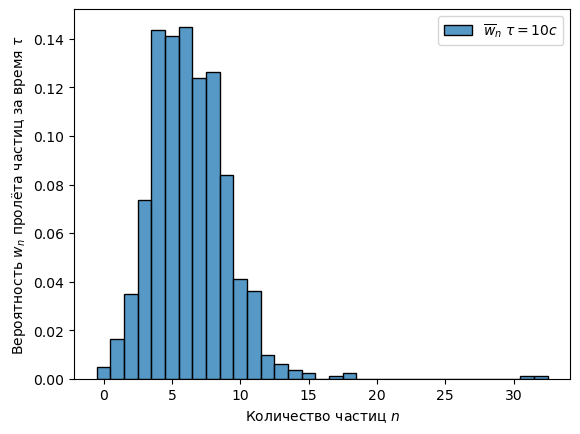

In [21]:
data=get_data('exp1.txt',5)
print(10)
n_av=np.sum(data)/data.shape[0]
print(n_av)
sigm_1=np.sqrt(n_av)
sigm_2=np.sqrt(np.sum((data - n_av)**2)/data.shape[0])
print(sigm_1,sigm_2)
print(np.abs(sigm_1-sigm_2)/sigm_2*100)
p1=data[(data>=n_av-sigm_2) & (data<=n_av+sigm_2)].shape[0]/data.shape[0]
p2=data[(data>=n_av-2*sigm_2) & (data<=n_av+2*sigm_2)].shape[0]/data.shape[0]
p3=data[(data>=n_av-3*sigm_2) & (data<=n_av+3*sigm_2)].shape[0]/data.shape[0]
print(p1,p2,p3)
fig,ax=plt.subplots()
sns.histplot(data, stat='probability', binwidth=1,discrete=True,ax=ax,label=r'$\overline{w}_n$ '+r'$\tau = 10 c$')
#sns.lineplot(x=np.arange(np.min(data),np.max(data)+1,1),y=pausson(np.arange(np.min(data),np.max(data)+1,1),n_av))
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
ax.legend()
fig.savefig('sus.png')

In [10]:
def plot(st,n,ax,c):
    data=get_data(st,n)
    print(n)
    n_av=np.sum(data)/data.shape[0]
    print(n_av)
    sigm_1=np.sqrt(n_av)
    sigm_2=np.sqrt(np.sum((data - n_av)**2)/data.shape[0])
    print(sigm_1,sigm_2)
    print(np.abs(sigm_1-sigm_2)/sigm_2*100)
    p1=data[(data>=n_av-sigm_2) & (data<=n_av+sigm_2)].shape[0]/data.shape[0]
    p2=data[(data>=n_av-2*sigm_2) & (data<=n_av+2*sigm_2)].shape[0]/data.shape[0]
    p3=data[(data>=n_av-3*sigm_2) & (data<=n_av+3*sigm_2)].shape[0]/data.shape[0]
    print(p1,p2,p3)
    sns.histplot(data, stat='probability', binwidth=1,discrete=True,ax=ax,label=r'$\overline{w}_n$ '+r"$\tau = "+str(n)+'c$', element='step',color=sns.color_palette()[c])
    sns.lineplot(x=np.arange(np.min(data),np.max(data)+1,1),y=pausson(np.arange(np.min(data),np.max(data)+1,1),n_av),ax=ax,label='$w_n$ '+r"$\tau = "+str(n)+'c$',color=sns.color_palette()[c])

5
6.245
2.49899979991996 2.4959917868454617
0.12051374088453731
0.71 0.955 0.99375
10
12.49
3.5341194094144583 3.4270833080040526
3.1232418879465182
0.6325 0.97 0.995
20
24.98
4.99799959983992 4.897917924996293
2.043351407194157
0.625 0.945 1.0
40
49.96
7.068238818828917 7.270378257009741
2.7803152880791453
0.62 0.97 1.0


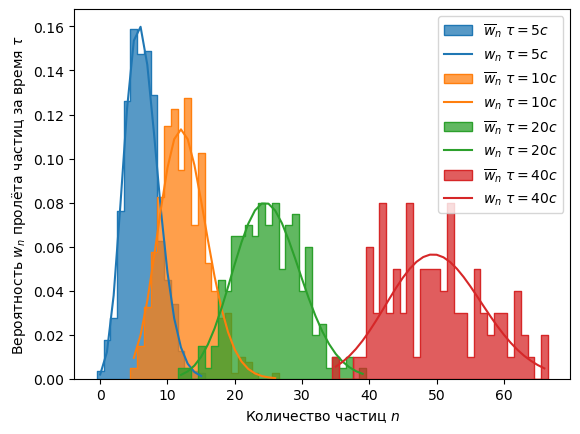

In [11]:
fig,ax=plt.subplots()
plot('exp2.txt',5,ax,0)
plot('exp2.txt',10,ax,1)
plot('exp2.txt',20,ax,2)
plot('exp2.txt',40,ax,3)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
fig.savefig('all.png')

5
6.245
2.49899979991996 2.4959917868454617
0.12051374088453731
0.71 0.955 0.99375


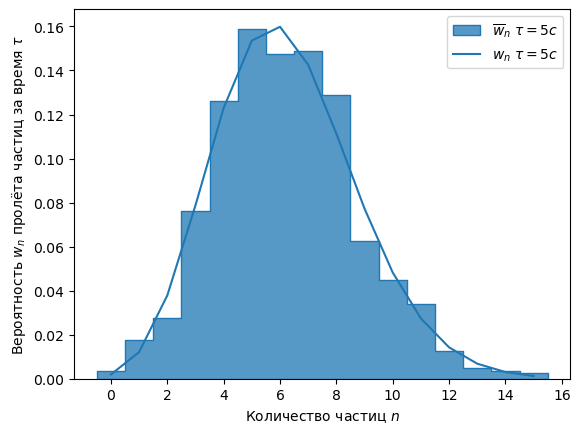

In [12]:
fig,ax=plt.subplots()
plot('exp2.txt',5,ax,0)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
fig.savefig('5.png')

10
12.49
3.5341194094144583 3.4270833080040526
3.1232418879465182
0.6325 0.97 0.995


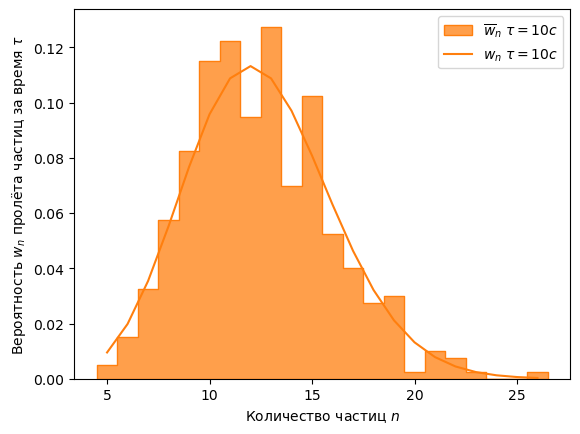

In [13]:
fig,ax=plt.subplots()
plot('exp2.txt',10,ax,1)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
fig.savefig('10.png')

20
24.98
4.99799959983992 4.897917924996293
2.043351407194157
0.625 0.945 1.0


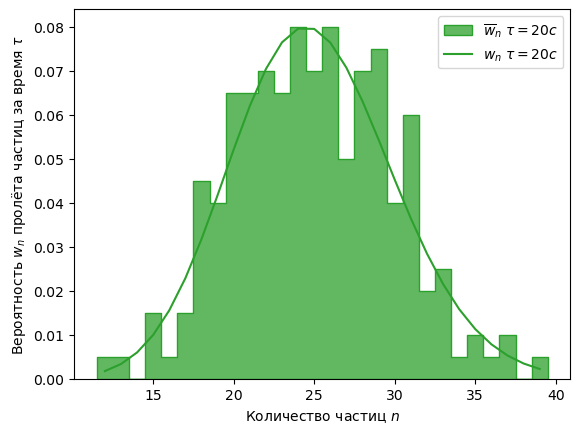

In [14]:
fig,ax=plt.subplots()
plot('exp2.txt',20,ax,2)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
fig.savefig('20.png')

40
49.96
7.068238818828917 7.270378257009741
2.7803152880791453
0.62 0.97 1.0


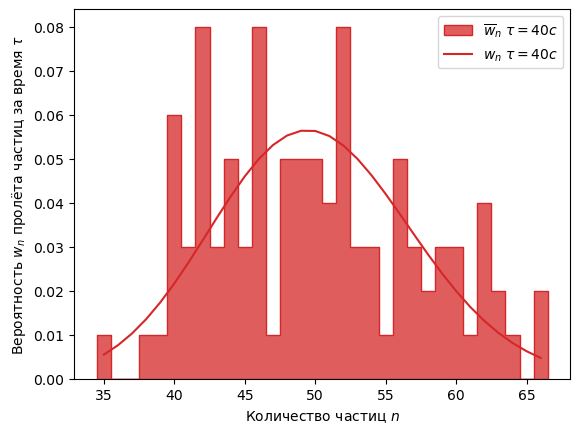

In [15]:
fig,ax=plt.subplots()
plot('exp2.txt',40,ax,3)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax.set_xlabel('Количество частиц $n$')
fig.savefig('40.png')

In [24]:
def plot2(st,n,ax,c):
    data=get_data(st,n)
    print(n)
    n_av=np.sum(data)/data.shape[0]
    print(n_av)
    sigm_1=np.sqrt(n_av)
    sigm_2=np.sqrt(np.sum((data - n_av)**2)/data.shape[0])
    print(sigm_1,sigm_2)
    print(np.abs(sigm_1-sigm_2)/sigm_2*100)
    p1=data[(data>=n_av-sigm_2) & (data<=n_av+sigm_2)].shape[0]/data.shape[0]
    p2=data[(data>=n_av-2*sigm_2) & (data<=n_av+2*sigm_2)].shape[0]/data.shape[0]
    p3=data[(data>=n_av-3*sigm_2) & (data<=n_av+3*sigm_2)].shape[0]/data.shape[0]
    print(p1,p2,p3)
    sns.histplot(data, stat='probability', binwidth=1,discrete=True,ax=ax,label=r'$\overline{w}_n$ '+r"$\tau = "+str(n)+'c$', element='step',color=c)
    #sns.lineplot(x=np.arange(np.min(data),np.max(data)+1,1),y=pausson(np.arange(np.min(data),np.max(data)+1,1),n_av),ax=ax,label='$w_n$ '+r"$\tau = "+str(n)+'c$',color=c)

10
12.49
3.5341194094144583 3.4270833080040526
3.1232418879465182
0.6325 0.97 0.995
40
49.96
7.068238818828917 7.270378257009741
2.7803152880791453
0.62 0.97 1.0


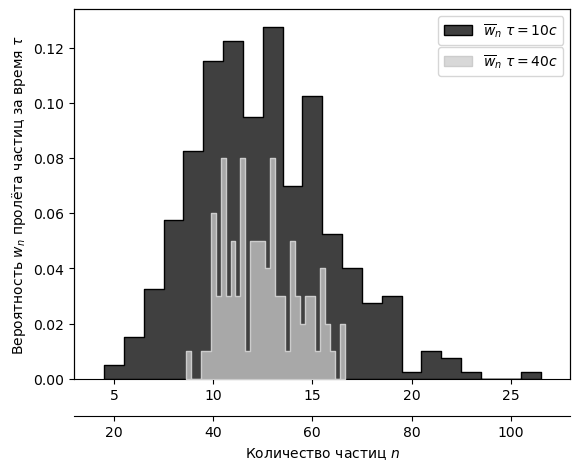

In [42]:
fig,ax=plt.subplots()
sns.set_palette(sns.color_palette("blend:#000,#fff"))
ax1=ax.twiny()
ax1.spines["bottom"].set_position(("axes", -0.1))
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
plot2('exp2.txt',10,ax,sns.color_palette()[0])
plot2('exp2.txt',40,ax1,sns.color_palette()[4])
#plot2('exp2.txt',40,ax)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax1.set_xlabel('Количество частиц $n$')
ax.set_xlim([3,28])
ax1.set_xlim([12,28*4])
ax1.legend(loc=(0.734,0.82))
ax.legend()
fig.savefig('hist.png',bbox_inches=tf.Bbox([[0, -0.4], [6, 4.5]]),)

In [33]:
import matplotlib.transforms as tf

5
6.245
2.49899979991996 2.4959917868454617
0.12051374088453731
0.71 0.955 0.99375
10
12.49
3.5341194094144583 3.4270833080040526
3.1232418879465182
0.6325 0.97 0.995
20
24.98
4.99799959983992 4.897917924996293
2.043351407194157
0.625 0.945 1.0
40
49.96
7.068238818828917 7.270378257009741
2.7803152880791453
0.62 0.97 1.0


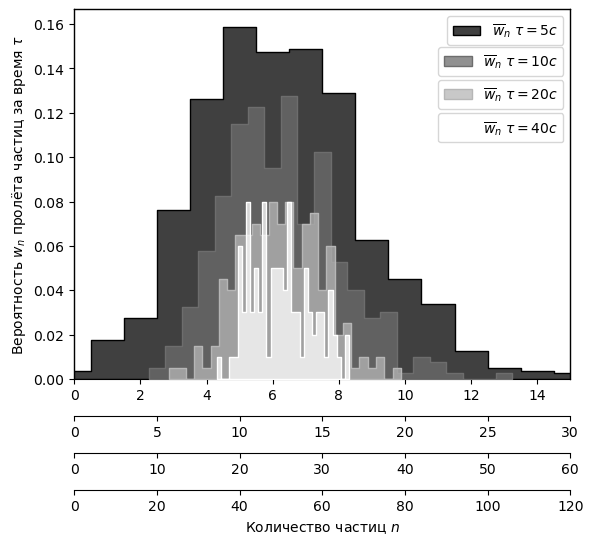

In [40]:
fig,ax=plt.subplots()
sns.set_palette(sns.color_palette("blend:#000,#fff",8))
ax1=ax.twiny()
ax1.spines["bottom"].set_position(("axes", -0.1))
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
ax2=ax.twiny()
ax2.spines["bottom"].set_position(("axes", -0.2))
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax3=ax.twiny()
ax3.spines["bottom"].set_position(("axes", -0.3))
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
plot2('exp2.txt',5,ax,sns.color_palette()[0])
plot2('exp2.txt',10,ax1,sns.color_palette()[3])
plot2('exp2.txt',20,ax2,sns.color_palette()[5])
plot2('exp2.txt',40,ax3,sns.color_palette()[7])
#plot2('exp2.txt',40,ax)
ax.set_ylabel(r'Вероятность $w_n$ пролёта частиц за время $\tau$')
ax3.set_xlabel('Количество частиц $n$')
ax.set_xlim([0,15])
ax1.set_xlim([0,30])
ax2.set_xlim([0,60])
ax3.set_xlim([0,120])
ax1.legend(loc=(0.734,0.82))
ax2.legend(loc=(0.734,0.73))
ax3.legend(loc=(0.734,0.64))
ax.legend()
fig.savefig('allhist.png',bbox_inches=tf.Bbox([[0, -1.1], [6, 4.5]]))

In [19]:
sns.color_palette("blend:#000,#fff")

[(0.0, 0.0, 0.0),
 (0.2, 0.2, 0.2),
 (0.4, 0.4, 0.4),
 (0.6, 0.6, 0.6),
 (0.8, 0.8, 0.8),
 (1.0, 1.0, 1.0)]

<Axes: ylabel='Probability'>

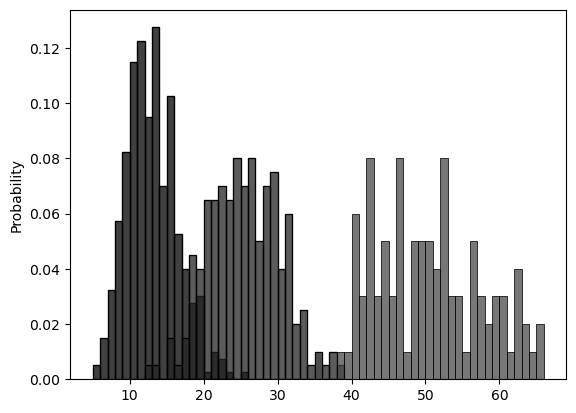

In [20]:
sns.histplot(get_data('exp2.txt',10), stat='probability', binwidth=1)
sns.histplot(get_data('exp2.txt',20), stat='probability', binwidth=1)
sns.histplot(get_data('exp2.txt',40), stat='probability', binwidth=1)

<Axes: ylabel='Probability'>

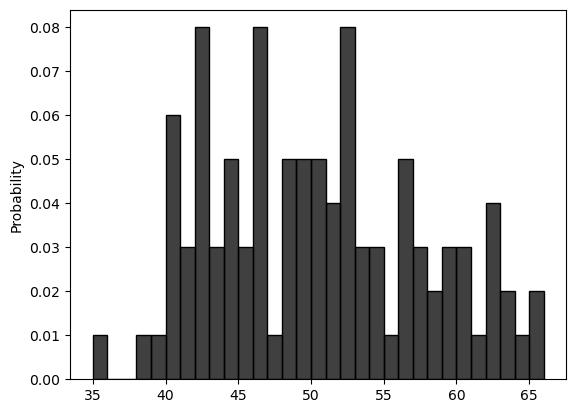

In [21]:
sns.histplot(get_data('exp2.txt',40), stat='probability', binwidth=1)